# Advanced Data Structures and Algorithms
By Dr. [Uzay Cetin](https://uzay00.github.io/kahve/)

 - Course for CMPE 232 @ Bilgi University
 - Python Implementations of Graph Algorithms

Go to our Book's web site: https://algs4.cs.princeton.edu/lectures/

# Prims Eager Version Code

> For each non-tree vertex v, the eager version of Prim's algorithm maintains at most one entry in the priority queue (with __key__ equal to the __weight of the cheapest edge__ from v to the tree).

__MST(A)__
<table>
    <tr>
        <td>
            <img src='figures/iteration.gif', width = '400'>
        </td>
        <td>
            <img src='figures/iteration.png', width = '600'>
        </td>
    </tr>
</table>

__MST(A)__
<table>
    <tr>
        <td>
            <img src='figures/iteration2.gif', width = '400'>
        </td>
        <td>
            <img src='figures/iteration.png', width = '600'>
        </td>
    </tr>
</table>

<img src="figures/prim0.png" alt="HTML5 Icon" width="700" height="500">

<img src="figures/prim02.png" alt="HTML5 Icon" width="700" height="500">

<img src="figures/prim03.png" alt="HTML5 Icon" width="700" height="500">

<img src="figures/prim04.png" alt="HTML5 Icon" width="700" height="500">

<img src="figures/prim05.png" alt="HTML5 Icon" width="700" height="500">

<img src="figures/prim06.png" alt="HTML5 Icon" width="700" height="500">

<img src="figures/prim07.png" alt="HTML5 Icon" width="700" height="500">

<img src="figures/prim08.png" alt="HTML5 Icon" width="700" height="500">

In [1]:
#!pip install pqdict
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt

from pqdict import pqdict # for an indexed priority queue (with key value pair) that allows updating values

In [2]:
def draw(g, node_name = None, sp =[], pos_fr = None, color = 'lightgreen', display = True):
    G = nx.Graph()
    G.add_weighted_edges_from(g.elist)
    
    if pos_fr: pos_fr = pos_fr
    else: pos_fr = nx.fruchterman_reingold_layout(G)
    
    fig = plt.figure(figsize=(10,10))       
    # Plot node labels
    nx.draw(G, pos=pos_fr, node_size=4000, node_color=color, font_size=50, with_labels=True)
    # Plot Edges
    nx.draw_networkx_edge_labels(G, pos=pos_fr, font_size=30,  edge_labels = nx.get_edge_attributes(G,'weight'))
    nx.draw_networkx_edges(G, pos=pos_fr, edgelist=sp, width=10, edge_color='b')
    
    if node_name:  plt.savefig(f'fig/iter{node_name}.png')
    if not display: plt.close(fig)
        
    return pos_fr

In [3]:
from PIL import Image

def animate(filename, order):
    # Create the frames
    frames = []
    imgs = [f'fig/iter{i}.png' for i in order]
    for i in imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)

    # Save into a GIF file that loops forever
    frames[0].save(f'fig/{filename}.gif', format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=5000, loop=0)

### Edge Class
Edge stores 
 - the name of two nodes s, t
 - weight between two nodes
 - other(v) returns the node other than v
    

<img src="figures/edge.png" alt="HTML5 Icon" width="700" height="500">

In [4]:
class edge():
    def __init__(self, s: str, t: str, weight:float):
        self.s = s
        self.t = t
        self.weight = weight
        
    def other(self, v):
        if self.s == v:
            return self.t
        return self.s
        
    def __str__(self):
        return "({}, {})".format(self.s,self.t)

   

### Node Class
 - Node stores list of edges

In [5]:
class node():
    def __init__(self, name: str):
        """
         - node has a name (str)
         - DIFFERENTLY neighbors is the list of edge objects
        """
        self.name = name
        self.neighbors = [] # list of edge objects !!
        
    def neighbors_name(self) -> list:
        """
        info about neighbors names (returns list of strings)
        """
        return [(e.t, e.weight) for e in self.neighbors]
      
     

### Weighted Undirected Graph

In [6]:
class weightedGraph():
    def __init__(self, elist: list):
        """
            self.nodes is a dictionary
                key   : node name
                value : node object
        """
        self.elist = elist
        self.node_names = list(set([s for s, t, w in elist] + [t for s,t,w in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        self.size = len(self.node_names) # how many nodes do we have
        self.create_graph()
      
    def add_edge(self, e:edge):
        """undirected Edge"""
        self.nodes[e.s].neighbors.append(e)
        self.nodes[e.t].neighbors.append(e)
    
    def create_graph(self):
        for s,t,w in self.elist:
            e = edge(s,t,w)
            self.add_edge(e)
                
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}


{'A': array([0.9978934 , 0.29122075]),
 'B': array([-0.81061415,  0.70877925]),
 'C': array([-0.18727924, -1.        ])}

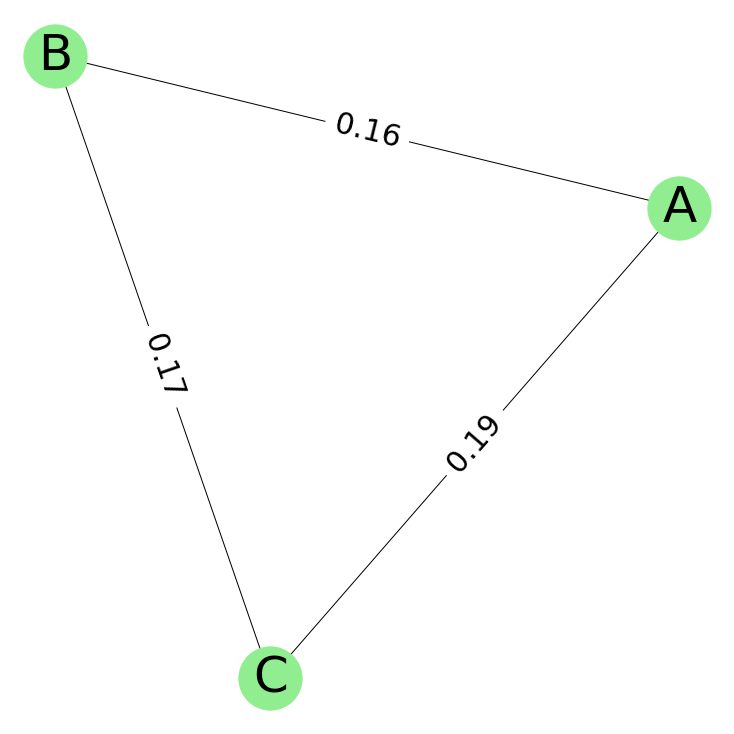

In [7]:
elist =[('A', 'B', 0.16),
        ('B', 'C', 0.17),
        ('A', 'C', 0.19)]
G = weightedGraph(elist)
draw(G, node_name = 23, sp = [])

# Prim's Eager Algorithm

In [8]:
pq = pqdict()
pq.additem('a', 4)
pq.additem('b', 6)
pq.additem('c', 7)
pq

pqdict({'a': 4, 'b': 6, 'c': 7})

In [9]:
if 'c' in pq:
    pq.updateitem('c', 1)
pq

pqdict({'c': 1, 'b': 6, 'a': 4})

In [10]:
pq.popitem()

('c', 1)

In [11]:
pq

pqdict({'a': 4, 'b': 6})

In [12]:
class primMST():
    '''
    Finding the mst of a graph using Prim's algorithm with eager implementation
    '''
    def __init__(self, G:weightedGraph, s):
        self.G = G
        self.k = 1
        self.pos_fr = draw(self.G, node_name = self.k, display= False) # inital position
        
        self.edgeTo = {n: None for n in G.node_names} # n: name of the node
        self.distTo = {n: float("inf") for n in G.node_names}
        # initially distance to every vertex is +inf, except source vertex s
        self.distTo[s] = 0
        
        
        
        self.pq = pqdict() # Indexed Priority Queue (Key: node name , Value: smallest distance)
        self.mst = [] # list for mst
        self.marked = {n: False for n in G.node_names} # 
        self.visit(s)
        
        while self.pq and len(self.mst) < G.size - 1:
            print('\tMST', [str(e) for e in self.mst])
            print('\tPQ', self.pq)
            print('\tMarked', self.marked )
            print('\n')
            
            
            v, distance = self.pq.popitem() # pop a vertex
            self.mst.append(self.edgeTo[v]) # adding the edge of the minimum distance in pq
            self.visit(v) # visiting the added vertix to mst
                
    def visit(self, v):
        print("Visit ",v)
        self.marked[v] = True # it is been added to mst
        draw(self.G, self.k, 
             sp = [(e.s, e.t) for e in self.mst], 
             pos_fr = self.pos_fr, display= False) # using same position
        self.k += 1
           
        for e in self.G.nodes[v].neighbors:
            t = e.other(v)
            if self.marked[t]: continue

            if e.weight < self.distTo[t]:
                self.distTo[t] = e.weight
                self.edgeTo[t] = e
                
                if(t in self.pq): 
                    self.pq.updateitem(t, self.distTo[t])
                else:
                    self.pq.additem(t, self.distTo[t])

In [13]:
elist =[(0, 7, 0.16),
        (2, 3, 0.17),
        (1, 7, 0.19),
        (0, 2, 0.26),
        (5, 7, 0.28),
        (1, 3, 0.29),
        (1, 5, 0.32),
        (2, 7, 0.34),
        (4, 5, 0.35),
        (1, 2, 0.36),
        (4, 7, 0.37),
        (0, 4, 0.38),
        (6, 2, 0.40),
        (3, 6, 0.52),
        (6, 0, 0.58),
        (6, 4, 0.93)]

G = weightedGraph(elist)

T = primMST(G,0)

print('the mst is',[(e.s, e.t) for e in T.mst], sep = '\n')
print('each node with the smallest edge connected to it',T.distTo, sep = '\n')

Visit  0
	MST []
	PQ pqdict({7: 0.16, 2: 0.26, 4: 0.38, 6: 0.58})
	Marked {0: True, 1: False, 2: False, 3: False, 4: False, 5: False, 6: False, 7: False}


Visit  7
	MST ['(0, 7)']
	PQ pqdict({1: 0.19, 2: 0.26, 4: 0.37, 6: 0.58, 5: 0.28})
	Marked {0: True, 1: False, 2: False, 3: False, 4: False, 5: False, 6: False, 7: True}


Visit  1
	MST ['(0, 7)', '(1, 7)']
	PQ pqdict({2: 0.26, 5: 0.28, 4: 0.37, 6: 0.58, 3: 0.29})
	Marked {0: True, 1: True, 2: False, 3: False, 4: False, 5: False, 6: False, 7: True}


Visit  2
	MST ['(0, 7)', '(1, 7)', '(0, 2)']
	PQ pqdict({3: 0.17, 5: 0.28, 4: 0.37, 6: 0.4})
	Marked {0: True, 1: True, 2: True, 3: False, 4: False, 5: False, 6: False, 7: True}


Visit  3
	MST ['(0, 7)', '(1, 7)', '(0, 2)', '(2, 3)']
	PQ pqdict({5: 0.28, 6: 0.4, 4: 0.37})
	Marked {0: True, 1: True, 2: True, 3: True, 4: False, 5: False, 6: False, 7: True}


Visit  5
	MST ['(0, 7)', '(1, 7)', '(0, 2)', '(2, 3)', '(5, 7)']
	PQ pqdict({4: 0.35, 6: 0.4})
	Marked {0: True, 1: True, 2: True, 

{0: array([-0.5875976 ,  0.60293921]),
 7: array([0.47210338, 0.51543358]),
 2: array([-0.23360717,  0.19067692]),
 3: array([-0.49767368, -0.79062201]),
 1: array([ 0.38898143, -0.48840295]),
 5: array([ 1.        , -0.02465599]),
 4: array([0.07106956, 0.08604387]),
 6: array([-0.61327593, -0.09141263])}

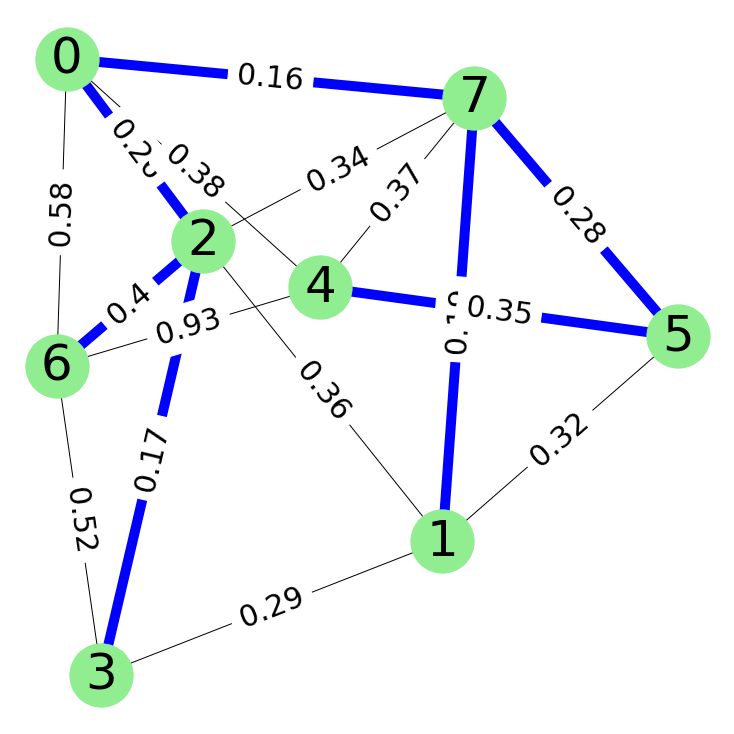

In [15]:
draw(G, sp = [(e.s, e.t) for e in T.mst])

{'A': array([ 0.18951779, -1.        ]),
 'B': array([0.76733664, 0.72295605]),
 'C': array([-0.95685443,  0.27704395])}

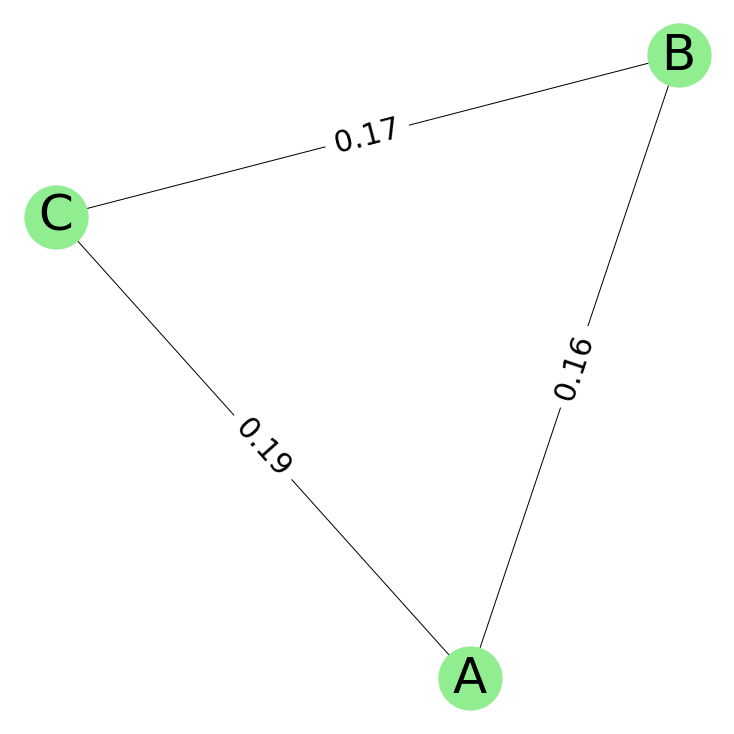

In [14]:
elist =[('A', 'B', 0.16),
        ('B', 'C', 0.17),
        ('A', 'C', 0.19)]
G = weightedGraph(elist)
draw(G, sp = [])

Visit  A
	MST []
	PQ pqdict({'B': 0.16, 'C': 0.19})
	Marked {'A': True, 'B': False, 'C': False}


Visit  B
	MST ['(A, B)']
	PQ pqdict({'C': 0.17})
	Marked {'A': True, 'B': True, 'C': False}


Visit  C
the mst is
[('A', 'B'), ('B', 'C')]
each node with the smallest edge connected to it
{'A': 0, 'B': 0.16, 'C': 0.17}


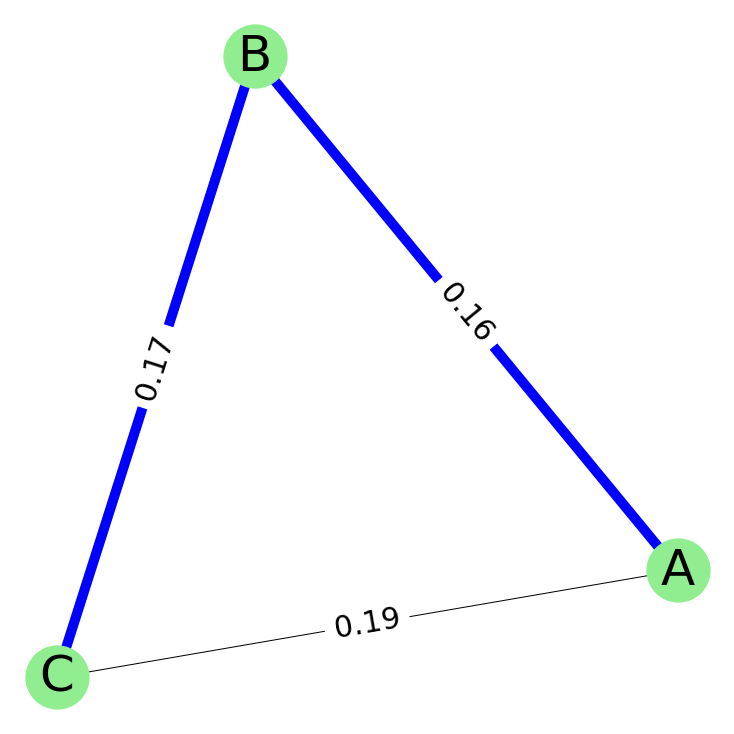

In [15]:
G = weightedGraph(elist)

T = primMST(G,'A')
draw(G, sp = [(e.s, e.t) for e in T.mst])

print('the mst is',[(e.s, e.t) for e in T.mst], sep = '\n')
print('each node with the smallest edge connected to it',T.distTo, sep = '\n')

# Example


Visit  A
	MST []
	PQ pqdict({'B': 3})
	Marked {'A': True, 'D': False, 'C': False, 'B': False}


Visit  B
	MST ['(A, B)']
	PQ pqdict({'D': 1, 'C': 2})
	Marked {'A': True, 'D': False, 'C': False, 'B': True}


Visit  D
	MST ['(A, B)', '(B, D)']
	PQ pqdict({'C': 2})
	Marked {'A': True, 'D': True, 'C': False, 'B': True}


Visit  C
the mst is
[('A', 'B'), ('B', 'D'), ('B', 'C')]
each node with the smallest edge connected to it
{'A': 0, 'D': 1, 'C': 2, 'B': 3}


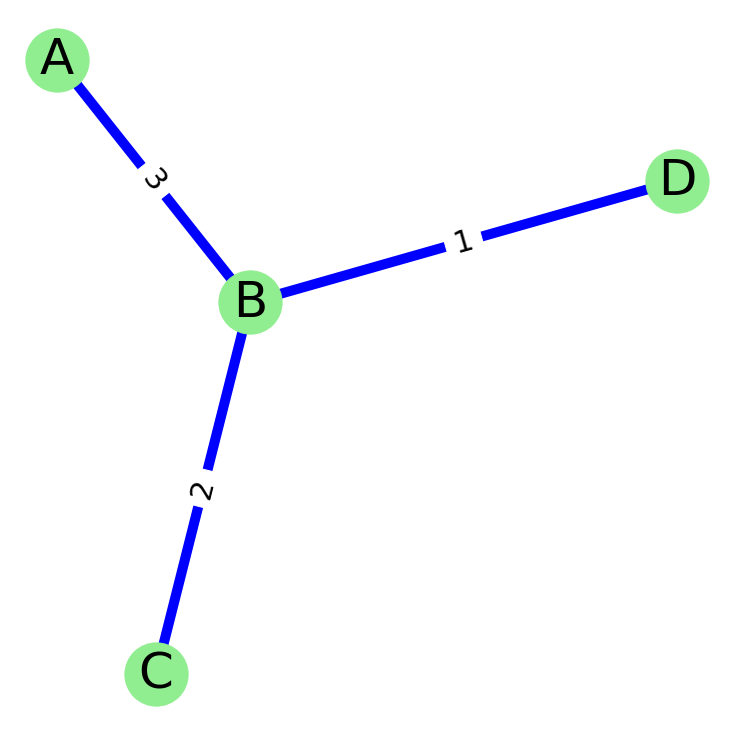

In [16]:
elist = [('A', 'B',3), ('B', 'C',2), ('B', 'D',1)]

G = weightedGraph(elist)


T = primMST(G,'A')
draw(G, sp = [(e.s, e.t) for e in T.mst])

print('the mst is',[(e.s, e.t) for e in T.mst], sep = '\n')
print('each node with the smallest edge connected to it',T.distTo, sep = '\n')

In [17]:
animate(filename = 'iter', order = [1,2,3, 4])

__MST(A)__
<table>
    <tr>
        <td>
            <img src='figures/iteration2.gif', width = '400'>
        </td>
        <td>
            <img src='figures/iteration.png', width = '600'>
        </td>
    </tr>
</table>